In [50]:
import numpy as np                                 # For Linear Algebra
import pandas as pd                                # For Data Preprocessing
import seaborn as sns                              # for creating plots
import matplotlib.pyplot as plt                    # For Visualisation
import sklearn
from sklearn.preprocessing import StandardScaler  # For standardising Numerical Variable 
from sklearn.preprocessing import OrdinalEncoder  # For Standardising Categorical Variable.
from sklearn.model_selection import train_test_split #For splitting the data into train and test size
from sklearn.linear_model import LogisticRegression  # For constructing Logistic Regression model
from sklearn import metrics                          #For metrics calculation
from sklearn.metrics import confusion_matrix         #For calculating confusion matrix
from sklearn.metrics import classification_report    # For Classification report
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_excel("sample_data.xlsx")

In [3]:
df.head()

,Firm ID,RISK,Ret/Inst,ClientBase,BrokerType,T1,T2,T3,T4,T5,Violations,IndustryAwards,District,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,101,3,Ret,1,small,68,70,82,58,52,0,0,1,NaN,NaN,NaN,NaN,NaN
1,102,1,Inst,2,small,68,66,82,72,72,0,0,1,NaN,NaN,NaN,NaN,NaN
2,103,3,Inst,3,small,78,78,88,52,84,0,0,1,NaN,NaN,NaN,NaN,NaN
3,104,3,Inst,1,small,74,74,84,66,64,0,0,1,NaN,NaN,NaN,NaN,NaN
4,105,3,Inst,2,small,78,62,80,78,102,0,0,1,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(200, 18)

In [5]:
df.drop(["Unnamed: 13"],axis=1,inplace=True)
df.drop(["Unnamed: 14"],axis=1,inplace=True)
df.drop(["Unnamed: 15"],axis=1,inplace=True)
df.drop(["Unnamed: 16"],axis=1,inplace=True)
df.drop(["Unnamed: 17"],axis=1,inplace=True)


In [6]:
df

,Firm ID,RISK,Ret/Inst,ClientBase,BrokerType,T1,T2,T3,T4,T5,Violations,IndustryAwards,District
0,101,3,Ret,1,small,68,70,82,58,52,0,0,1
1,102,1,Inst,2,small,68,66,82,72,72,0,0,1
2,103,3,Inst,3,small,78,78,88,52,84,0,0,1
3,104,3,Inst,1,small,74,74,84,66,64,0,0,1
4,105,3,Inst,2,small,78,62,80,78,102,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,296,2,Ret,3,small,126,130,142,138,142,1,5,20
196,297,3,Inst,2,small,126,126,150,144,132,1,4,20
197,298,2,Inst,2,small,146,134,142,126,132,1,7,20
198,299,2,Ret,2,small,142,130,144,132,112,1,5,20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Firm ID         200 non-null    int64 
 1   RISK            200 non-null    int64 
 2   Ret/Inst        200 non-null    object
 3   ClientBase      200 non-null    int64 
 4   BrokerType      200 non-null    object
 5   T1              200 non-null    int64 
 6   T2              200 non-null    int64 
 7   T3              200 non-null    int64 
 8   T4              200 non-null    int64 
 9   T5              200 non-null    int64 
 10  Violations      200 non-null    int64 
 11  IndustryAwards  200 non-null    int64 
 12  District        200 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 20.4+ KB


In [8]:
df.isnull().sum()

Firm ID           0
RISK              0
Ret/Inst          0
ClientBase        0
BrokerType        0
T1                0
T2                0
T3                0
T4                0
T5                0
Violations        0
IndustryAwards    0
District          0
dtype: int64

In [27]:
#Deleting duplicate values from the data table.

print('Entrées dupliquées: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Entrées dupliquées: 0


In [9]:
df.describe()

,Firm ID,RISK,ClientBase,T1,T2,T3,T4,T5,Violations,IndustryAwards,District
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,200.500000,2.025000,2.055000,104.460000,105.550000,105.290000,103.700000,104.810000,0.265000,1.670000,10.430000
std,57.879185,0.690477,0.724291,20.505874,18.957172,18.736896,19.801782,21.471587,0.442441,1.818691,5.801152
min,101.000000,1.000000,1.000000,56.000000,62.000000,66.000000,52.000000,52.000000,0.000000,0.000000,1.000000
25%,150.750000,2.000000,2.000000,88.000000,91.500000,90.000000,88.000000,92.000000,0.000000,0.000000,5.000000
50%,200.500000,2.000000,2.000000,100.000000,108.000000,104.000000,106.000000,104.000000,0.000000,1.000000,10.500000
75%,250.250000,2.250000,3.000000,120.000000,120.000000,118.000000,116.000000,122.000000,1.000000,2.000000,15.000000
max,300.000000,3.000000,3.000000,152.000000,134.000000,150.000000,148.000000,142.000000,1.000000,7.000000,20.000000


"T1-T5: Average tests scores of the registered reps in the firm (T1-T5)".

T1 has maximum 152 score,T2 has 134, T3 has 150, T4 has 148, T5 has 142. Highest score is of "T1".

T1 has minimum 56 score,T2 has 62, T3 has 66, T4 has 52 , T5 has 52.Lowest score is of "T4" and "T5".


In [10]:
df.nunique()

Firm ID           200
RISK                3
Ret/Inst            2
ClientBase          3
BrokerType          2
T1                 30
T2                 29
T3                 40
T4                 34
T5                 22
Violations          2
IndustryAwards      7
District           20
dtype: int64

<AxesSubplot:xlabel='Violations', ylabel='count'>

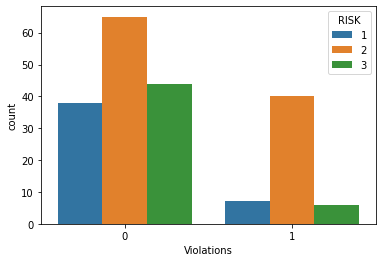

In [11]:
sns.countplot(x="Violations", data=df, hue="RISK")

"RISK – 3 being the highest to each member firm."

Interpretations:

In 0-Violation firms:

Firms which have Risk-2 are more in number, and firms with Risk-1 has lesser  number of "0-violations" than Risk-2 firms and Risk-1 firms.

Whereas in Violation-1 we can see that:

Firms having Risk-2 has comapratively less count than firms in violations-0.
And Firms with Risk-1 and Risk-3 has least number in Violation-1.

<AxesSubplot:xlabel='Violations', ylabel='count'>

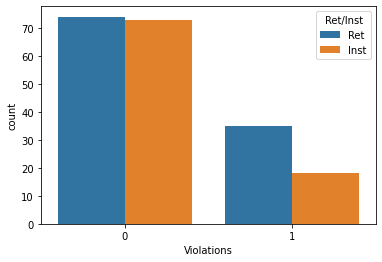

In [12]:
sns.countplot(x="Violations", data=df, hue="Ret/Inst")

Firm (Retail versus Institutional – Ret/Inst)

Firms with "0-violations" has higher Retail business,

whereas Firms with "1-violations" also has more Retail business, but comparatively lower than 0 violation firms.

<AxesSubplot:xlabel='Violations', ylabel='count'>

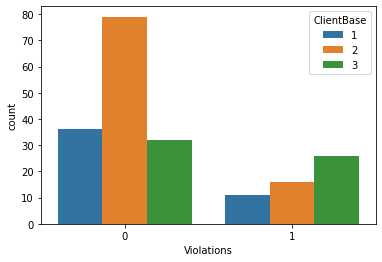

In [13]:
sns.countplot(x="Violations", data=df, hue="ClientBase")

Client Base (Each number represents a separate client group)

Firms with "0-violation" has "2-client" groups which is  more in number than other client groups.

Firms with "1-violation" has "3-client" groups which is higher in number than other two client groups, but clients are comparatively lower than "0-violation".

<AxesSubplot:xlabel='Violations', ylabel='count'>

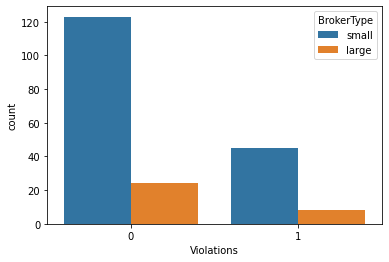

In [14]:
sns.countplot(x="Violations", data=df, hue="BrokerType")

Broker type (small/large):

Firms with "0-violation" has  higher number of "small Broker type" and less number of "Large Broker type".
Whereas 

Firms with "1-violation" has higher number of "small Broker type" and less number of "Large Broker type" but comparatively lower than "0-violation".



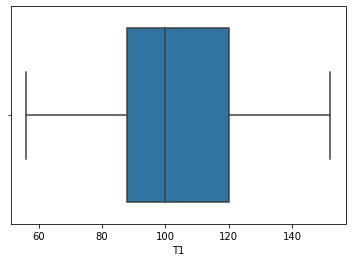

In [15]:
sns.boxplot(x="T1", data=df);

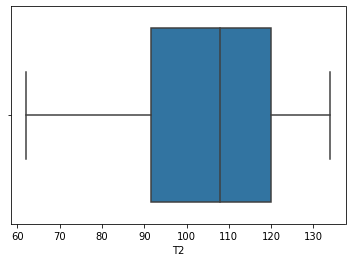

In [16]:
sns.boxplot(x="T2", data=df);

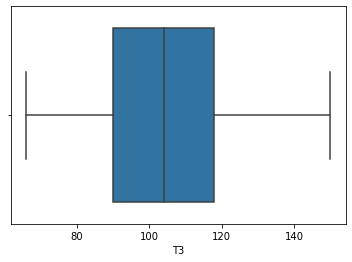

In [17]:
sns.boxplot(x="T3", data=df);

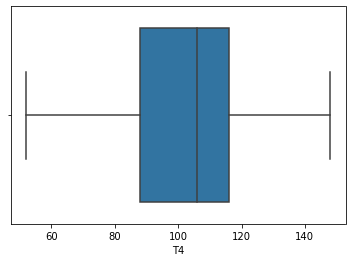

In [18]:
sns.boxplot(x="T4", data=df);

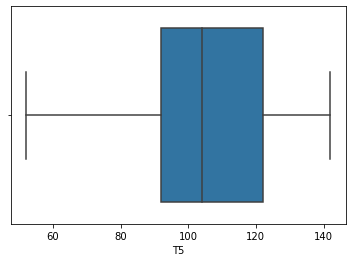

In [19]:
sns.boxplot(x="T5", data=df);

C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


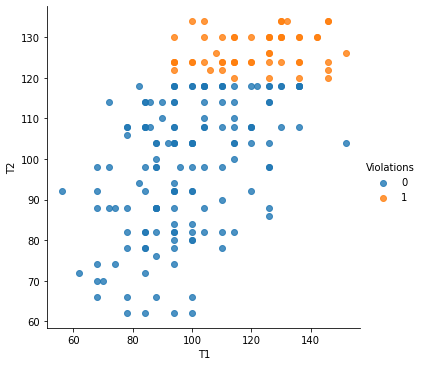

In [20]:
sns.lmplot("T1","T2", data=df, hue="Violations", fit_reg=False);

Firms with higher T1 value ranging between (90-140) and T2 values ranging between (120-130) are more likely to have 
"1-Violation".

C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


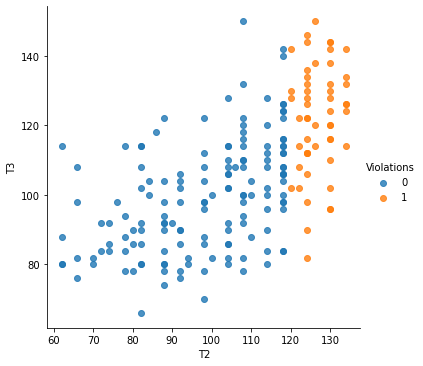

In [21]:
sns.lmplot("T2","T3", data=df, hue="Violations", fit_reg=False);

Firms with T2 values (120-130)  and T3 with (80-130 ) are more likely to have "1-Violation".

C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


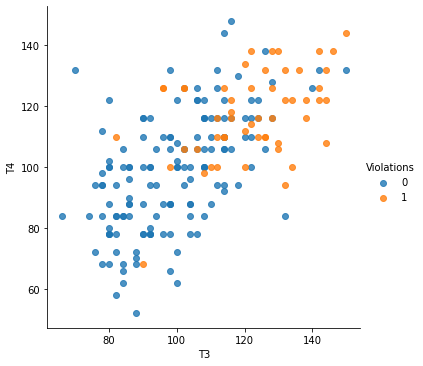

In [22]:
sns.lmplot("T3","T4", data=df, hue="Violations", fit_reg=False);

T3 having values (100-140) and T4 having values (100-140) are more likely to have "1-Violation".

C:\Users\NAMRATA KESHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


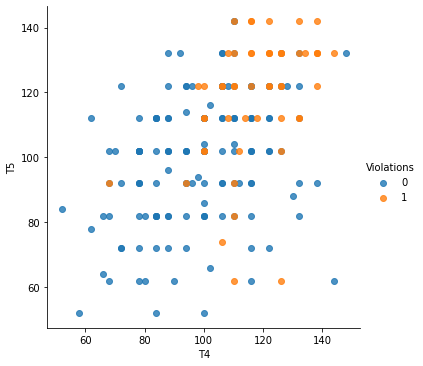

In [23]:
sns.lmplot("T4","T5", data=df, hue="Violations", fit_reg=False);

T4 and T5 have "0-Violation" ranging from 60-130 .

In [24]:
# We will drop the Firm Id column ,
#Since it has unique id for each upcoming Firm ,so will not be any reference of for training model.

df.drop(["Firm ID"],inplace=True , axis=1)

In [25]:
correlation = df.corr()
correlation['Violations'].sort_values(ascending=False)

Violations        1.000000
IndustryAwards    0.814911
T2                0.675724
District          0.630836
T3                0.541691
T1                0.489417
T4                0.417503
T5                0.387769
ClientBase        0.189507
RISK             -0.038244
Name: Violations, dtype: float64

<AxesSubplot:>

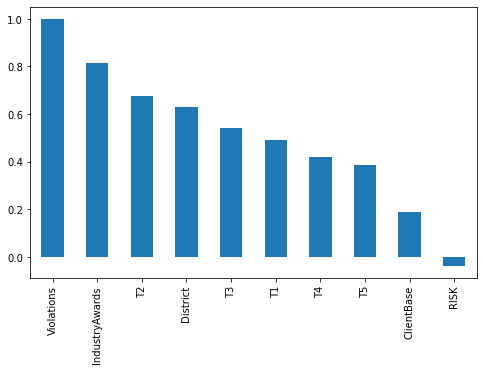

In [26]:
#Correlation of other features with violations attribute

plt.figure(figsize=(8,5))
df.corr()['Violations'].sort_values(ascending=False).plot(kind='bar')

From the above graph we can see that :

Violations        1.000000

IndustryAwards    0.814911

T2                0.675724

Firm ID           0.634516

District          0.630836

T3                0.541691

T1                0.489417

T4                0.417503

T5                0.387769

ClientBase        0.189507

RISK             -0.038244

"Industry Awards" has highest correlation with "Violation" variable,so we should eliminate this feature,because it may result in  an abrupt prediction.

Also "T2","T3" and "District" has higher correlation which is more than "0.5",hence we should also eliminate these three variables.

Here "T1","T4", "T5","ClientBase","Risk" will be the important features to predict "Violation" variable.

In [29]:
df.drop(["IndustryAwards","T2","District","T3"],axis=1, inplace=True)
              

#### Checking Correlation after eliminating correlated variables.

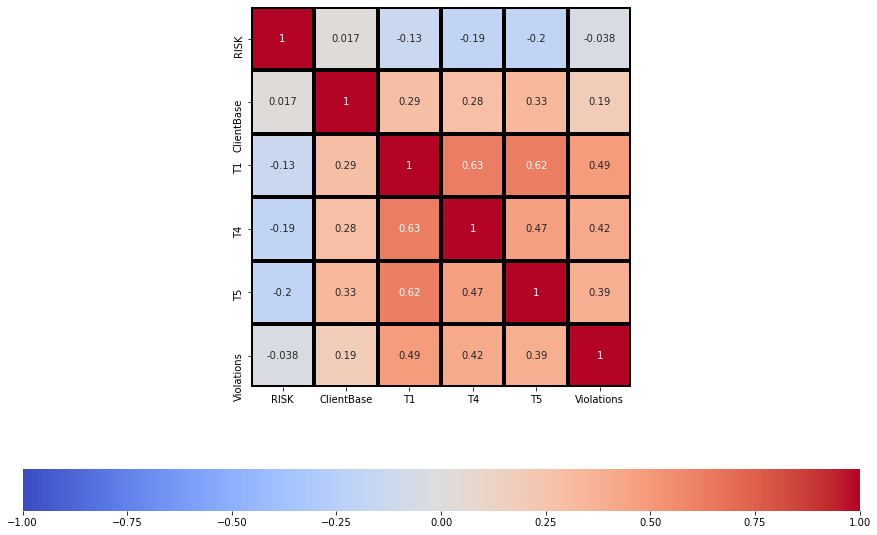

In [47]:
#To check the correlation between the variables

f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr() ,annot=True ,fmt='.2g', vmax=1,vmin=-1,center=0, cmap="coolwarm",linewidths=3,linecolor='black' , cbar_kws= {'orientation': 'horizontal'} ,square=True,ax=ax)
plt.show()

#### Segregating the X and y for Training the data.

In [30]:
#DEfining X and y for training the data.

X=df.drop(["Violations"],axis=1)
y=df["Violations"]

In [31]:
#To Categorize categorical columns and numerical columns separately in a list in the data.

cat=[]
num=[]
for i in df.columns:
    if df[i].dtypes==object:
        cat.append(i)
    else:
        num.append(i)

print('The numerical data are :{}'.format(num))
print('The categorical data are :{}'.format(cat))

The numerical data are :['RISK', 'ClientBase', 'T1', 'T4', 'T5', 'Violations']
The categorical data are :['Ret/Inst', 'BrokerType']


In [32]:
num_data=X[['RISK', 'ClientBase', 'T1', 'T4', 'T5']]
cat_data=X[['Ret/Inst', 'BrokerType']]

In [33]:
# For standardising the numerical variable.

sc=StandardScaler()

In [34]:
num_sc=sc.fit_transform(num_data)
num_df=pd.DataFrame(num_sc,columns=num_data.columns)
num_df.head()    #Standardised Numerical Data.

,RISK,ClientBase,T1,T4,T5
0,1.415610,-1.460251,-1.782489,-2.313665,-2.465701
1,-1.488206,-0.076127,-1.782489,-1.604883,-1.531900
2,1.415610,1.307998,-1.293600,-2.617428,-0.971620
3,1.415610,-1.460251,-1.489156,-1.908647,-1.905421
4,1.415610,-0.076127,-1.293600,-1.301120,-0.131199


In [35]:
#For standardising Categorical variable.
oe=OrdinalEncoder() 
cat_oe=oe.fit_transform(cat_data)
cat_df=pd.DataFrame(cat_oe,columns=cat_data.columns)


In [36]:
cat_df.head() #Standardised Categorical variable

,Ret/Inst,BrokerType
0,1.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [37]:
concat=pd.concat([num_df,cat_df],axis=1)   #Combining  both the Standardised Numerical and Categorical dataset in a X dataset.

In [38]:
X=concat.copy()

In [39]:
X
#Now we got the Standardised data for all the columns.

,RISK,ClientBase,T1,T4,T5,Ret/Inst,BrokerType
0,1.415610,-1.460251,-1.782489,-2.313665,-2.465701,1.0,1.0
1,-1.488206,-0.076127,-1.782489,-1.604883,-1.531900,0.0,1.0
2,1.415610,1.307998,-1.293600,-2.617428,-0.971620,0.0,1.0
3,1.415610,-1.460251,-1.489156,-1.908647,-1.905421,0.0,1.0
4,1.415610,-0.076127,-1.293600,-1.301120,-0.131199,0.0,1.0
...,...,...,...,...,...,...,...
195,-0.036298,1.307998,1.053067,1.736514,1.736403,1.0,1.0
196,1.415610,-0.076127,1.053067,2.040278,1.269502,0.0,1.0
197,-0.036298,-0.076127,2.030845,1.128987,1.269502,0.0,1.0
198,-0.036298,-0.076127,1.835289,1.432751,0.335701,1.0,1.0


In [40]:
#Training the model

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

#### Logistic Regression Model

In [48]:
# logistic Regression model

model_lr = LogisticRegression()
model_lr.fit(X_train , y_train)
y_pred=model_lr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 81.66666666666667


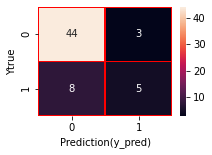

In [42]:
CM = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(3,2))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(y_pred)")
plt.ylabel("Ytrue")
plt.show()

In [43]:
print(confusion_matrix(y_test, y_pred))

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

print('\nTrue Positives(TP) = ', CM[0,0])

print('\nTrue Negatives(TN) = ', CM[1,1])

print('\nFalse Positives(FP) = ', CM[0,1])

print('\nFalse Negatives(FN) = ', CM[1,0])

[[44  3]
 [ 8  5]]

True Positives(TP) =  44

True Negatives(TN) =  5

False Positives(FP) =  3

False Negatives(FN) =  8


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        47
           1       0.62      0.38      0.48        13

    accuracy                           0.82        60
   macro avg       0.74      0.66      0.68        60
weighted avg       0.80      0.82      0.80        60



In [45]:
TP = CM[0,0]
TN = CM[1,1]
FP = CM[0,1]
FN = CM[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))



print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

Classification accuracy : 0.8167
Precision : 0.9362
Recall or Sensitivity : 0.8462
Specificity : 0.6250
True Positive Rate : 0.8462
False Positive Rate : 0.3750


AxesSubplot(0.125,0.125;0.775x0.755)


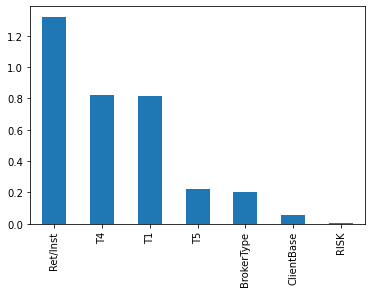

In [46]:
# To get the weights of all the variables
weights = pd.Series(model_lr.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

### RandomForest Classifier

In [52]:
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred)*100)

80.0


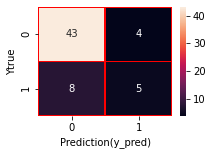

In [53]:
CM = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(3,2))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(y_pred)")
plt.ylabel("Ytrue")
plt.show()

In [54]:
confusion_matrix(y_test, y_pred)

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

print('\nTrue Positives(TP) = ', CM[0,0])

print('\nTrue Negatives(TN) = ', CM[1,1])

print('\nFalse Positives(FP) = ', CM[0,1])

print('\nFalse Negatives(FN) = ', CM[1,0])


True Positives(TP) =  43

True Negatives(TN) =  5

False Positives(FP) =  4

False Negatives(FN) =  8


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88        47
           1       0.56      0.38      0.45        13

    accuracy                           0.80        60
   macro avg       0.70      0.65      0.67        60
weighted avg       0.78      0.80      0.79        60



In [56]:
TP = CM[0,0]
TN = CM[1,1]
FP = CM[0,1]
FN = CM[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))



print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

Classification accuracy : 0.8000
Precision : 0.9149
Recall or Sensitivity : 0.8431
Specificity : 0.5556
True Positive Rate : 0.8431
False Positive Rate : 0.4444


<AxesSubplot:>

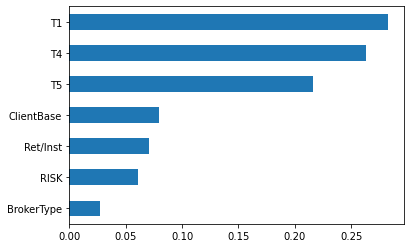

In [57]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

From the Random Forest Classifier, we get Accuracy score 80%.
And the Features contributing in this model are different in weights than that of Logistic model.

Here
 "T1" has highest contribution in predicting the model.
 
 "T4" has second highest contribution in it.
 
 Folllowed by "T5", "Clientbase", "Retail/Institutional", "RISK", "Brokertype".

### Got a good Accuracy score for the Logistic model i.e 81.66 %  for predicting Violation Variable.

#### Important Features which contribute to This model are  "Retail/Institutional" feature, "T4" score ,"T1" score, "T5" score, "Brokertype" feature, "ClientBase" feature, "RISK" feature.

From the above graph we can see that:

 "Retail/Institutional" has highest contribution to it.
 
 "T4" score ,"T1" score has equal level of contribution in predicting this model.
 
 "T5" score, "Brokertype" feature has lesser contribution in it.
 
 "Risk" has least contribution in it.
 
 
 
 
